<a href="https://colab.research.google.com/github/macodebcn/datascience_samples/blob/main/lesson1_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello everyone! This notebook is created based on Jeremy Howard's notebook from the Practical Deep Learning course by fast.ai.
The thing is, I was having trouble getting the original notebook to work, so I decided to do something but with dogs 🐶. I came across this dog page during one of the subjects in the Data Science degree that I'm studying. By the way, this is my first foray into deep learning.

Here you have the original notebook: https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data/ (fantastic course!!)

Cheers!

This text was translated into English with Microsoft Copilot.

Searching for 'bulldog'


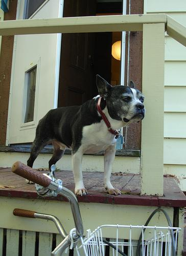

In [9]:
# Import the necessary modules
import requests
from fastdownload import download_url
from fastai.vision.all import *

def search_images(term, max_images=1):
    print(f"Searching for '{term}'")

    # Define the URL of the web page
    url = f"https://dog.ceo/api/breed/{term}/images/random/{max_images}"

    # Send a GET request to the URL and get the response
    response = requests.get(url)

    # Check if the response was successful (code 200)
    if response.status_code == 200:
        # Get the content of the response in JSON format
        data = response.json()
        # Return the URLs of the images
        return data['message']
    else:
        # Print an error message if the response was not successful
        print("Error getting data from the web page")
        return []

# Search for an image of a dog
urls = search_images('bulldog', max_images=1)

# Download the image
dest = 'dog.jpg'
download_url(urls[0], dest, show_progress=False)

# Open the image and convert it to a thumbnail
im = Image.open(dest)
im.to_thumb(256,256)

In [10]:
# Import the necessary modules
from time import sleep
from pathlib import Path

# Define the dog breeds you want to search for
searches = ['bulldog', 'labrador']

# Define the path where you want to save the images
path = Path('/content/sample_data')

# Search and download images for each dog breed
for o in searches:
    # Create a directory for this dog breed
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)

    # Search and download images of this dog breed
    urls = search_images(o, max_images=20)
    for url in urls:
        download_url(url, dest, show_progress=False)
        sleep(10)  # Pause between downloads to avoid over-loading server

    # Resize the images to a maximum size of 400 pixels
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'bulldog'
Searching for 'labrador'


In [11]:
# let's verify the images

# Verify the downloaded images
failed = verify_images(get_image_files(path))

# Delete the images that cannot be opened
failed.map(Path.unlink)

# Count how many images failed in the verification
len(failed)

0

epoch,train_loss,valid_loss,error_rate,time
0,0.882572,0.155968,0.052632,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.711817,0.050643,0.000000,00:27
1,0.430668,0.009942,0.000000,00:25
2,0.323776,0.004683,0.000000,00:25
3,0.253273,0.005108,0.000000,00:25
4,0.207832,0.006730,0.000000,00:26


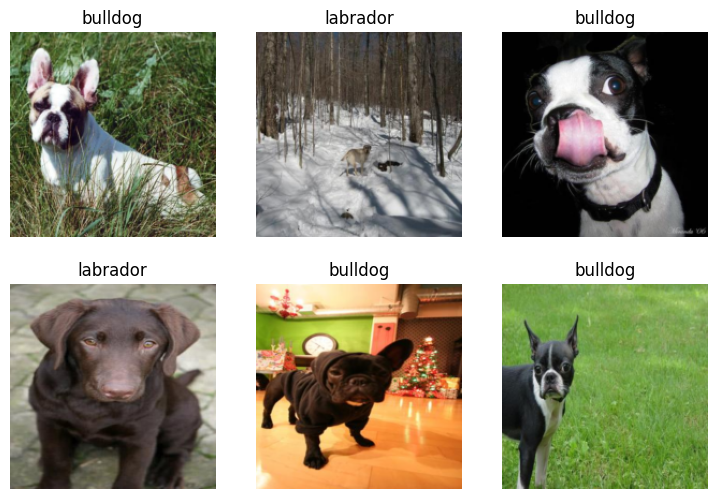

In [12]:
# let's train the model

# Create a DataBlock
datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
)

# Create a DataLoader
dls = datablock.dataloaders(path, bs=32)

# Show a batch of images
dls.show_batch(max_n=6)

# Create a model
learn = vision_learner(dls, resnet34,metrics=error_rate)

# Train the model
learn.fine_tune(5)

In [13]:
# Predict the breed of the dog in the image
is_dog,_,probs = learn.predict(PILImage.create('dog.jpg'))

# Print the breed of the dog
print(f"This is a: {is_dog}.")

# Print the probability that it's that breed of dog
print(f"Probability it's a {is_dog}: {probs[0]:.4f}")

This is a: bulldog.
Probability it's a bulldog: 0.9981
